<a href="https://colab.research.google.com/github/ThatManRong/APM466_A2/blob/main/APM466_A2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [44]:
import math
import numpy as np

In [45]:
def generate_gas_tree(N,u,d,S, swing):
    # generate the gas price tree
    lattice_S = np.zeros((N+1, N+1, swing+1))
    for s in range(swing+1):
        for j in range(N+1):
            for i in range(j+1):
                lattice_S[i][j][s] = S*math.pow(d,i)*math.pow(u,j-i)
    return lattice_S        

def payoff(spot,call,K):
    if call == 0: #Call Option
        payoff = max(spot-K,0)
    else:         #Put Option
        payoff = max(K-spot,0)
    return payoff

def generate_option_premium(lattice,K,call,N,df,optiontype, swing):
    epsilon = 0   #1e-9, 1e-12, 1e-15
    lattice_option = np.zeros((N+1, N+1, swing+1))
    if call == 0:
        lattice_option[:,-1,:] = np.maximum(lattice[:,-1, :]-K,0)
    else:
        lattice_option[:,-1,:] = np.maximum(K-lattice[:,-1, :],0)
    lattice_option[:,:,0] = 0
    stop_time = []
    for s in range(1,swing+1):
        stop_time_s = []       
        for j in range(N,0,-1):            
            for i in range(j,0,-1):
                if optiontype == 0: # European Option    
                    lattice_option[i-1,j-1,s] = df * ((1-p)*lattice_option[i][j]+p*lattice_option[i-1][j])
                elif optiontype == 1: # American Option
                    lattice_option[i-1,j-1,s] = max(df * ((1-p)*lattice_option[i][j][s] + p*lattice_option[i-1][j][s]),payoff(lattice[i-1,j-1,s],call,K))
                elif optiontype == 2: #Swing Option
                    keep_value = df * ((1-p)*lattice_option[i][j][s] + p*lattice_option[i-1][j][s]) 
                    early_exercise_value = payoff(lattice[i-1,j-1,s],call,K) + df * ((1-p)*lattice_option[i][j][s-1] + p*lattice_option[i-1][j][s-1]) 
                    lattice_option[i-1,j-1,s] = max(keep_value,early_exercise_value)
                    if early_exercise_value > keep_value + epsilon: #We exercise at this spot
                        stop_time_s.append((i-1,j-1))
        stop_time.append(stop_time_s)
    return lattice_option, stop_time

In [46]:
u = 1.1
d = 1/u
p=  (1-d)/(u-d) # probability of stock price going up in risk neutral measure (Q-measure)
# (lattice,K,call,N,df,optiontype, swing)

lattice_S = generate_gas_tree(N = 52,u = u, d = d, S = 50, swing = 4)
#print(lattice_S)

P_Swing_4up, stop_time_4up = generate_option_premium(lattice_S,K = 50,call = 0,N = 52,df = 1,optiontype = 2, swing = 4)   #Option type = 2 -> Swing Option   #Call = 0 -> Call
print("The 4 up-swing option is: ", P_Swing_4up[0][0][4])

P_Amer_call, stop_time = generate_option_premium(lattice_S,K = 50,call = 0,N = 52,df = 1,optiontype = 1, swing = 4)   #Option type = 2 -> Swing Option   #Call = 0 -> Call
print("American call is: ", P_Amer_call[0][0][4])

lattice_S = generate_gas_tree(N = 52,u = u, d = d, S = 50000, swing = 4)
#print(lattice_S)


P_Swing,stop_time_4down = generate_option_premium(lattice_S,K = 50000,call = 2,N = 52,df = 1,optiontype = 2, swing = 4)   #Option type = 2 -> Swing Option   #Call = 2 -> Put
print("The 4 down-swing option is: ", P_Swing[0][0][4])

P_Amer_put,stop_time = generate_option_premium(lattice_S,K = 50000,call = 2,N = 52,df = 1,optiontype = 1, swing = 4)   #Option type = 2 -> Swing Option   #Call = 2 -> Put
print("American put is: ", P_Amer_put[0][0][4])


The 4 up-swing option is:  53.014634751614594
American call is:  13.379945098909047
The 4 down-swing option is:  53014.63475161459
American put is:  13379.945098909047


In [47]:
#Exercise Strategy for 4-upswing option
print("If there is 1 exercise left on upswing, will exercise at these nodes: \n",stop_time_4up[0])
print("\n If there are 2 exercise left on upswing, will exercise at these nodes: \n",stop_time_4up[1])
print("\n If there are 3 exercise left on upswing, will exercise at these nodes: \n",stop_time_4up[2])
print("\n If there are 4 exercise left on upswing, will exercise at these nodes: \n",stop_time_4up[3])

print("\n\n")

#Exercise Strategy for 4-downswing option
print("If there is 1 exercise left on downswing, will exercise at these nodes: \n",stop_time_4down[0])
print("\n If there are 2 exercise left on downswing, will exercise at these nodes: \n",stop_time_4down[1])
print("\n If there are 3 exercise left on downswing, will exercise at these nodes: \n",stop_time_4down[2])
print("\n If there are 4 exercise left on downswing, will exercise at these nodes: \n",stop_time_4down[3])


If there is 1 exercise left on upswing, will exercise at these nodes: 
 [(24, 51), (23, 51), (10, 51), (8, 51), (19, 50), (15, 50), (5, 50), (2, 50), (22, 49), (21, 49), (18, 49), (8, 49), (7, 49), (4, 48), (2, 48), (12, 47), (1, 46), (0, 44), (15, 42)]

 If there are 2 exercise left on upswing, will exercise at these nodes: 
 [(25, 51), (24, 51), (23, 51), (22, 51), (21, 51), (20, 51), (19, 51), (18, 51), (17, 51), (16, 51), (15, 51), (14, 51), (13, 51), (12, 51), (11, 51), (10, 51), (9, 51), (8, 51), (7, 51), (6, 51), (5, 51), (4, 51), (3, 51), (2, 51), (1, 51), (0, 51), (19, 50), (10, 50), (7, 50), (22, 49), (21, 49), (18, 49), (5, 49), (4, 49), (20, 48), (17, 48), (7, 48), (4, 47), (3, 47), (6, 46), (4, 45), (15, 42), (2, 42)]

 If there are 3 exercise left on upswing, will exercise at these nodes: 
 [(25, 51), (24, 51), (23, 51), (22, 51), (21, 51), (20, 51), (19, 51), (18, 51), (17, 51), (16, 51), (15, 51), (14, 51), (13, 51), (12, 51), (11, 51), (10, 51), (9, 51), (8, 51), (7, 5

In [48]:
def plot_exercise_node(stop_time): 
  #Input is the stop time of 4 up, which consists of 1 - 4 exercise left cases
  X, Y = [],[]
  for s in range(len(stop_time)):
      X_at_S = []
      Y_at_S = []
      for i in range(len(stop_time[s])):
          X_at_S.append(stop_time[s][i][1])
          Y_at_S.append(52-stop_time[s][i][0])
      X.append(X_at_S)
      Y.append(Y_at_S)
  return X, Y

X_up, Y_up = plot_exercise_node(stop_time_4up)
X_down, Y_down = plot_exercise_node(stop_time_4down)

In [49]:
X_tree = []
Y_tree = []
for i in range(52):
  for j in range(52,0,-1):
    if 52-j <= i:
      X_tree.append(i)
      Y_tree.append(j)

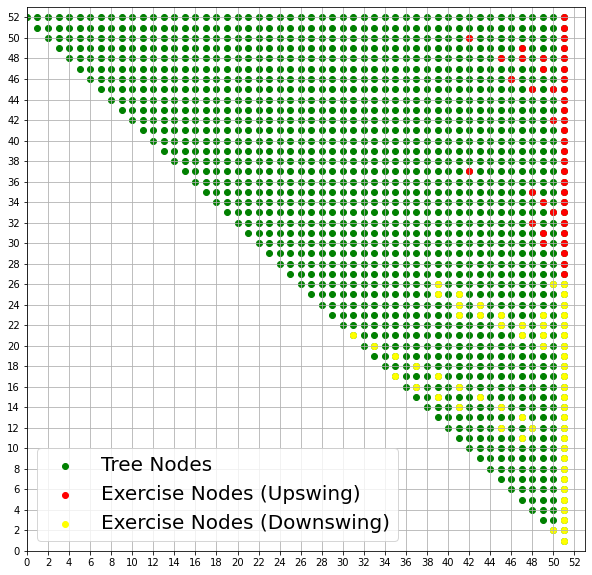

In [50]:
# X_tree = [i for i in range(0,53,1)]
# Y_tree = [i for i in range(52,-1, -1)]
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10,10))
ax = fig.gca()
ax.set_xticks(np.arange(0, 53, 2))
ax.set_yticks(np.arange(0, 53, 2))
plt.xlim(0,53)
plt.ylim(0,53)

plt.scatter(X_tree, Y_tree, color = "green", marker = "o")
plt.scatter(X_up[1], Y_up[1], color = "red")
plt.scatter(X_down[1], Y_down[1], color = "yellow")
plt.legend(["Tree Nodes", "Exercise Nodes (Upswing)", "Exercise Nodes (Downswing)"], prop={'size': 20})
plt.grid()
plt.show()

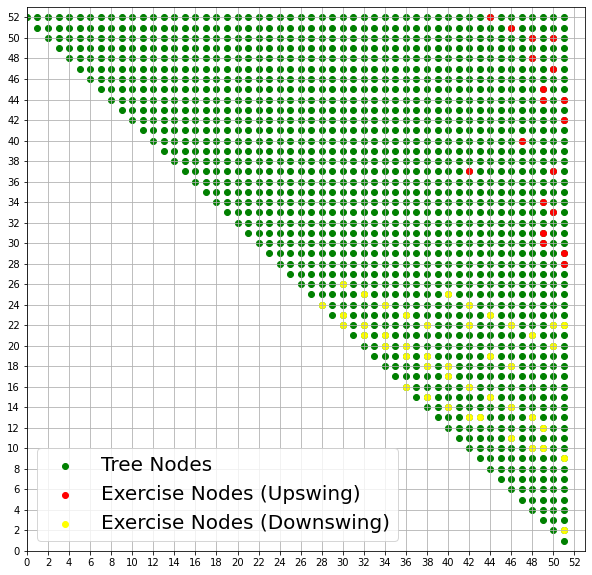

In [51]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10,10))
ax = fig.gca()
ax.set_xticks(np.arange(0, 53, 2))
ax.set_yticks(np.arange(0, 53, 2))
plt.xlim(0,53)
plt.ylim(0,53)

plt.scatter(X_tree, Y_tree, color = "green", marker = "o")
plt.scatter(X_up[0], Y_up[0], color = "red")
plt.scatter(X_down[0], Y_down[0], color = "yellow")
plt.legend(["Tree Nodes", "Exercise Nodes (Upswing)", "Exercise Nodes (Downswing)"], prop={'size': 20})
plt.grid()
plt.show()

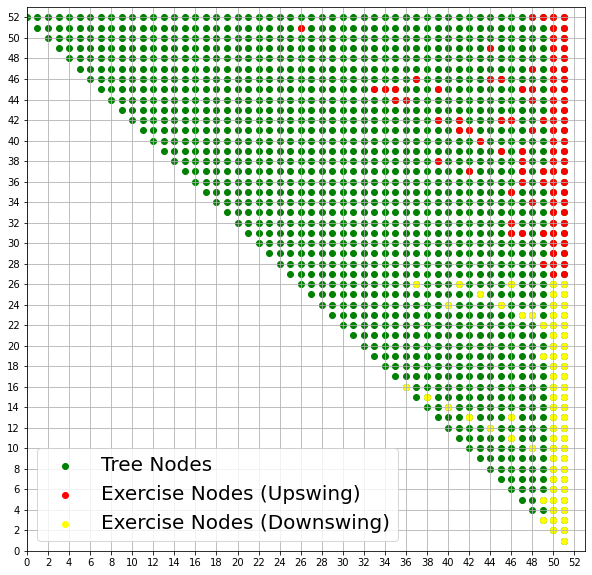

In [52]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10,10))
ax = fig.gca()
ax.set_xticks(np.arange(0, 53, 2))
ax.set_yticks(np.arange(0, 53, 2))
plt.xlim(0,53)
plt.ylim(0,53)

plt.scatter(X_tree, Y_tree, color = "green", marker = "o")
plt.scatter(X_up[2], Y_up[2], color = "red")
plt.scatter(X_down[2], Y_down[2], color = "yellow")
plt.legend(["Tree Nodes", "Exercise Nodes (Upswing)", "Exercise Nodes (Downswing)"], prop={'size': 20})
plt.grid()
plt.show()

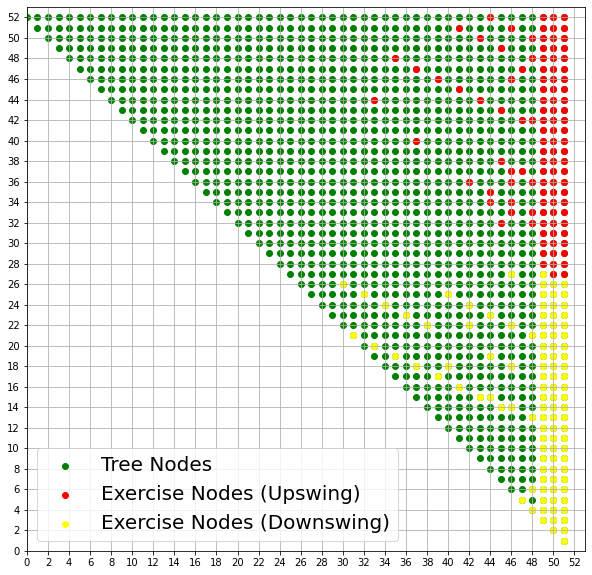

In [53]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10,10))
ax = fig.gca()
ax.set_xticks(np.arange(0, 53, 2))
ax.set_yticks(np.arange(0, 53, 2))
plt.xlim(0,53)
plt.ylim(0,53)

plt.scatter(X_tree, Y_tree, color = "green", marker = "o")
plt.scatter(X_up[3], Y_up[3], color = "red")
plt.scatter(X_down[3], Y_down[3], color = "yellow")
plt.legend(["Tree Nodes", "Exercise Nodes (Upswing)", "Exercise Nodes (Downswing)"], prop={'size': 20})
plt.grid()
plt.show()